# 1 load data

In [163]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [164]:
df = pd.read_excel('Online Retail.xlsx', sheet_name='Online Retail')

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [166]:
df.shape

(541909, 8)

In [167]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# 2. Data Clean-Up

Handling negative quantity:
Có các giao dịch với giá trị Quantity < 0, đại diện cho các đơn đặt hàng bị hủy => bỏ qua các
đơn đặt hàng bị hủy.

In [168]:
df[df['Quantity'] <= 0].shape

(10624, 8)

In [169]:
df = df.loc[df['Quantity'] > 0]

In [170]:
df.shape

(531285, 8)

# Dropping NaN records
Cần xóa bỏ những hồ sơ không có CustomerID. Vì chúng ta sẽ xây dựng một mô hình
Machine Learning để dự đoán giá trị khách hàng 3 tháng nên cần nhóm dữ liệu theo cột
CustomerID. Không có CustomerID, chúng ta không thể xây dựng mô hình.

In [171]:
pd.isnull(df['CustomerID']).sum()

133361

In [172]:
df.shape

(531285, 8)

In [173]:
df= df[pd.notnull(df['CustomerID'])]

In [174]:
df.shape

(397924, 8)

In [175]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Handling incomplete data
Bộ dữ liệu chứa các giao dịch trong khoảng thời gian từ ngày 01/12/2010 => 09/12/2011.
Trong đó, tháng 12/2011 chưa đủ dữ liệu. Để xây dựng mô hình đúng cho dự đoán giá trị khách hàng 3 tháng, thì cần bỏ qua các giao dịch trong tháng cuối cùng.

In [176]:
print('Date Range: %s - %s' % (df['InvoiceDate'].min(),df['InvoiceDate'].max()))

Date Range: 2010-12-01 08:26:00 - 2011-12-09 12:50:00


In [177]:
print('Date Range: ',df['InvoiceDate'].min(), '-', df['InvoiceDate'].max())

Date Range:  2010-12-01 08:26:00 - 2011-12-09 12:50:00


In [178]:
# Số giao dịch tính từ 01/12/2011 => sau

In [179]:
df.loc[df['InvoiceDate'] >= '2011/12/01' ].shape

(17304, 8)

In [180]:
# Số giao dịch trước 01/12/2011

In [181]:
df= df[df['InvoiceDate'] < '2011-12-01']

In [182]:
df.shape

(380620, 8)

# Total Sales value
Tạo cột 'Sales' (total purchase amount for each transaction) = 'Quantity' * 'UnitPrice'

In [183]:
df['Sales'] = df['UnitPrice']*df['Quantity']

In [184]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Per Order Data
Nhóm dữ liệu theo CustomerID và InvoiceNo

In [185]:
orders_df= df.groupby(['CustomerID','InvoiceNo']).agg({'Sales':sum,'InvoiceDate':max})

In [186]:
orders_df

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       313.65 2011-11-23 13:27:00
           579673       223.61 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17758 rows x 2 columns]

# 3. Data Analysis
Để tính toán CLV, cần biết purchase_frequency (tần suất mua hàng), purchase_duration (thời
gian mua hàng), avg (tiền mua hàng trung bình), count (số lần mua hàng) của khách hàng.

In [187]:
def groupby_mean(x):
    return x.mean()
def groupby_count(x):
    return x.count()
def purchase_duration(x):
    return (x.max() - x.min()).days
def avg_frequency(x):
    return ((x.max() - x.min()).days)/x.count()
groupby_mean.__name__ = 'avg'
groupby_count.__name__='count'
purchase_duration.__name__='purchase_duration'
avg_frequency.__name__='purchase_frequency'
summary_df = orders_df.reset_index().groupby('CustomerID').agg({'Sales':[min,max,sum,groupby_mean,groupby_count],
                                                                'InvoiceDate':[min,max,purchase_duration,avg_frequency]
                                                                })
summary_df

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000     1   
18281.0        80.82     80.82     80.82     80.820000     1   
18282.0       100.21    100.21    100.21    100.210000     1   
18283.0         1.95    313.65   1886.88    125.792000    15   
18287.0        70.68   1001.32   1837.28    612.426667     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4298 rows x 9 columns]

In [188]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [189]:
summary_df

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000
...,...,...,...,...,...,...,...,...,...
18280.0,180.60,180.60,180.60,180.600000,1,2011-03-07 09:52:00,2011-03-07 09:52:00,0,0.000000
18281.0,80.82,80.82,80.82,80.820000,1,2011-06-12 10:53:00,2011-06-12 10:53:00,0,0.000000
18282.0,100.21,100.21,100.21,100.210000,1,2011-08-05 13:35:00,2011-08-05 13:35:00,0,0.000000


In [190]:
summary_df.shape

(4298, 9)

In [191]:
summary_df.describe()

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_purchase_duration,invoicedate_purchase_frequency
count,4298.000000,4298.00000,4298.000000,4298.000000,4298.000000,4298.000000,4298.000000
mean,266.298816,613.89789,1952.818779,400.255621,4.131689,125.092369,29.437265
std,1219.631315,1747.66601,8354.913254,1271.187289,7.420253,128.908309,34.268072
min,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,95.770000,223.36000,304.305000,178.602500,1.000000,0.000000,0.000000
50%,172.175000,366.17000,657.265000,295.033958,2.000000,83.000000,20.121324
75%,310.722500,618.19250,1599.515000,431.594250,4.000000,245.000000,48.000000
max,77183.600000,77183.60000,268478.000000,77183.600000,201.000000,364.000000,182.000000


In [192]:
summary_df = summary_df.loc[summary_df['invoicedate_purchase_duration']>0]

In [193]:
summary_df.shape

(2692, 9)

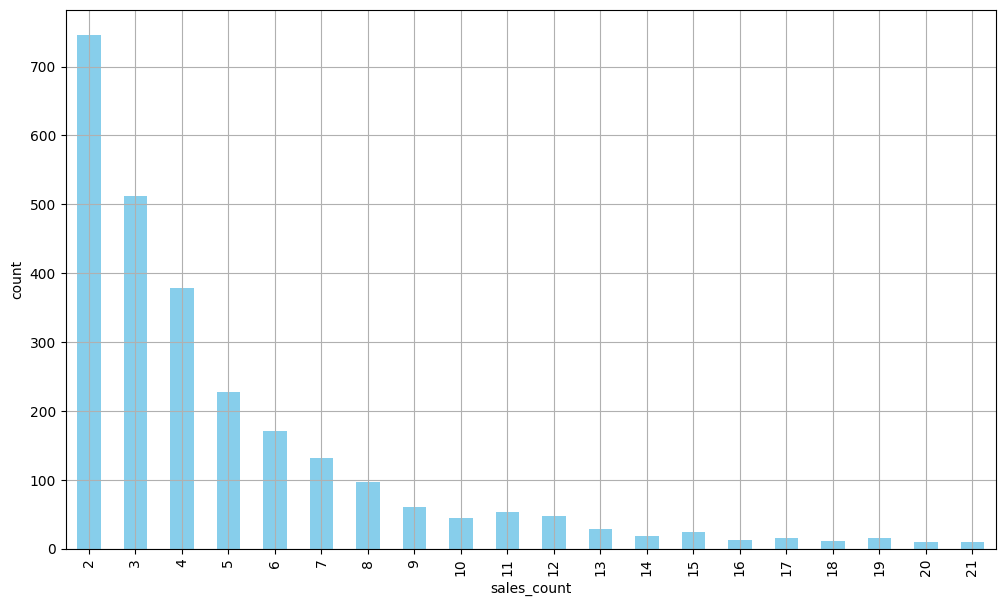

In [194]:
ax = summary_df.groupby('sales_count').count()['sales_avg'][:20].plot(kind='bar',color ='skyblue',grid=True, figsize=(12,7))
ax.set_ylabel('count')
plt.show()

In [195]:
# Biểu đồ cho thấy phần lớn khách hàng đã thực hiện 9 lần mua hoặc ít hơn trong lịch sử.

In [196]:
summary_df['sales_count'].describe()

count    2692.000000
mean        5.971025
std         8.878128
min         2.000000
25%         2.000000
50%         4.000000
75%         6.000000
max       201.000000
Name: sales_count, dtype: float64

In [197]:
summary_df['sales_avg'].describe()

count     2692.000000
mean       391.458687
std        465.584404
min          3.450000
25%        197.661000
50%        306.043333
75%        444.524000
max      14844.766667
Name: sales_avg, dtype: float64

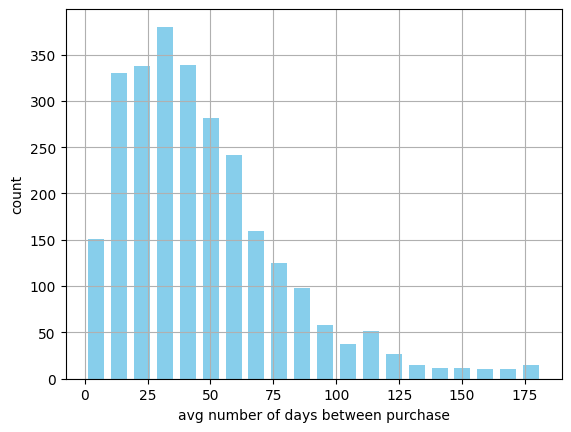

In [200]:
ax = summary_df['invoicedate_purchase_frequency'].hist(grid=True, color ='skyblue', bins=20, rwidth = 0.7)
ax.set_xlabel('avg number of days between purchase')
ax.set_ylabel('count')
plt.show()

In [201]:
# Biểu đồ cho chúng ta cái nhìn tổng thể về tần suất khách hàng lặp lại mua hàng trong lịch sử.
# Từ đó có thể thấy phần lớn khách hàng lặp lại việc mua hàng sau 20 đến 50 ngày.